# Week 2 IT Class Ordinary Differential Equations

## Question 1

We have the ODE:

$$\frac{dy}{dt} = y$$

subject to the initial condition $y(0) = 1$.

(a)	Find the particular solution of $y(t)$, and calculate $y(1)$.

(b)	Using Euler’s method and Python to calculate $y(1)$, with different time steps $h$ = 0.2, 0.05, 0.01 and 0.002.

(c)	Compare the results from the two methods, plot the difference between the exact value and the Euler approximation as a function of the time step $h$.

## Answer:
<b>(a)</b> we use the method of seperation of variables:


$$\frac{dy}{y} = dt.$$

integrate both sides

$$\int \frac{dy}{y} = \int dt,$$

we have

$$ln(y) = t+C,$$

$$y = Ce^{t}.$$

Apply initial condition $y(0)=1$, we have $$ C =1 $$, then the particlar solution is:
 
$$y = e^{t},$$

and $y(1) = e$





<b>(b)</b> For (b), we need to iterate for multiple steps. The Python code is shown below:

In [1]:
import numpy as np      # Import related packages. Numpy: Fundamental scientific computing package.
import math             # Math: Fundamentatal mathematical operations.

The iteration formula for the Euler's method can be written as:
$$y_{n+1} = y_{n}+h*f(t_n,y_n),$$
where $y_{n}$ and $y_{n+1}$ represent the values of $y$ at the current and the next time step, respectively. For the present problem, $f(t_n,y_n)=y_n$.

In [2]:
h = 0.01                  # You can change h here, h=0.2,0.05,0.01,0.002
nsteps = math.floor(1/h)  # Number of iterations for t=1 with the time step h
f = lambda t,y : y          # Defination of the function f(t,y)=y
y = 1                     # Initial value. y(t=0)=1.
t = 0                     # start from t=0
for i in range(nsteps):
    y = y + h * f(t , y)        # iteration with the Euler's method: y_n+1=y_n+h*f(y_n,t_n).
    t = t + h               # Update of current time
print('Using the Euler\'s method with h =', h, ', y(1) =', y)

e = 2.718281828           # Euler's number. Analytical solution of y(1).
diff = abs(y - e)           # Error of the numerical solution.
print('The difference between the numerical and analytical solutions is', diff)

Using the Euler's method with h = 0.01 , y(1) = 2.704813829421526
The difference between the numerical and analytical solutions is 0.013467998578474027


<b>(c)</b> We now calculate $diff$ at different h values and plot the result. Please use the code above and fill your results in the two arrays <b>hs</b> and <b>diffs</b> in the code below.

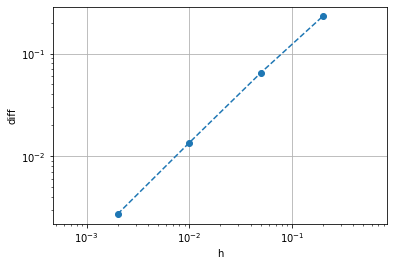

In [3]:
import matplotlib.pyplot as plt

# Please calculate difference between analytical solution and nuemrical solution using previous code section.
hs = [0.002,0.01,0.05,0.2]       #h values
diffs = [0.0027133074,0.0134679986,0.0649841229,0.2299618280]       #Difference between numerical and analytical solution

# Plot time step vs error in dual log scale.
plt.plot(hs,diffs,'--o')
plt.xlabel('h')
plt.ylabel('diff')
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.grid()
plt.show()

Now measure the slope of the h-diff plot. We can see the error of Euler's method is propotional to step $h$.

## Question 2

Use the Euler’s method and Python programming to calculate the temperature of an object that follows the Newton’s cooling law:

$$\frac{dT}{dt} = -k(T-T_{s}).$$

The initial temperature of the object is $100^{\circ}C$ at $t = 0$, and the environment temperature $T_{s} = 20^{\circ}C$. The constant $k = 1  (1/s)$. 

(a)	Find the particular solution of $T(t)$, and calculate $T(1)$.

(b)	Use Euler’s method and Python to calculate $T(1)$, with different time steps $h =$ 0.2, 0.1, 0.02, 0.002.

(c)	Compare the results from the two methods, plot the difference between the exact value and the Euler approximation as a function of the time step $h$.

(d)	Plot the time evolutions of the temperature till $t = 2s$, with $h=$0.2, 0.1 and 0.02, and compare the results with the analytical solution in the same figure.


## Answer:
<b>(a)</b> use the method of seperation of variables, rewrite the ODE as

$$\frac{dT}{T-T_{s}} = -kdt.$$

integrate bth sides

$$ln(T-T_{s}) = -kt+C,$$

$$T = Ce^{-kt}+T_{s}.$$

with $T_s = 20 ^{\circ}C$, and $k=1 s^{-1}$, apply initial condition $T(0) = 100 ^{\circ}C$, we easily get the particlar solution:
 
$$T = 80e^{-t}+20,$$

and $T(1) = 49.43 ^{\circ}C$.

<b>(b)</b> We need to iterate using Python

In [4]:
h = 0.2
nsteps = math.floor(1/h)  # Number of iterations, 1s
f = lambda t,T : -(T - 20)    # Function defination. f(t,T)=-(T-20).
t = 0                     # Initial value. T(t=0)=100.
T = 100
for i in range(nsteps):
    T = T + h * f(t , T)        # Euler iteration step. yn+1=yn+h*f(yn,tn).
    t = t + h               # Update current time.
print(f'Using Euler\'s method with h = {h}, y(1) = {T}.')
diff=abs(T - 80 * math.exp(-1) - 20)
print('The difference between the numerical and analytical solutions is', diff)

Using Euler's method with h = 0.2, y(1) = 46.2144.
The difference between the numerical and analytical solutions is 3.215955293715389


<b>(c)</b> Plot h vs difference
Please use the code above and fill your results in the two arrays <b>hs</b> and <b>diffs</b> in the code below.

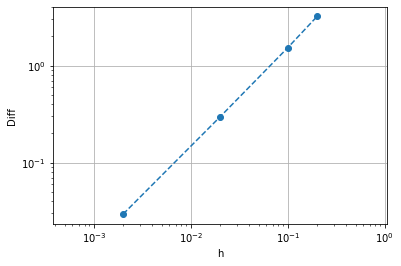

In [5]:
# Please calculate difference between analytical solution and nuemrical solution using previous code section.
hs = [0.002,0.02,0.1,0.2]             # h values
diffs = [0.0294549051,0.296780889,1.5360800857,3.215955294]   # Difference between numerical and analytical solution

plt.plot(hs,diffs,'--o')
plt.xlabel('h')
plt.ylabel('Diff')
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.grid()
plt.show()

<b>(d)</b> In order to plot the time evolution of temperature, we need an array to store the intantaneous temperature at every time step. The code is changed as following:

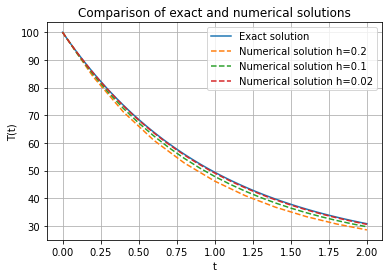

In [6]:
# analytical solution
h = 0.02
nsteps = math.floor(2/h)          # Number of iterations, 2s.
t_a = np.zeros(nsteps+1)          # time array
T_a = np.zeros(nsteps+1)          # temperature array
t_a[0] = 0                        # Initial value. T(t = 0) = 100.
T_a[0] = 100                      # We create array here to store all time evolution history.
for i in range(nsteps):
    t_a[i+1] = t_a[i] + h
    T_a[i+1] = 80 * math.exp(-t_a[i+1]) + 20       # Euler iteration step, array implementation. yn+1=yn+h*f(yn,tn).

#numerical solution with h=0.02     
h = 0.02
nsteps = math.floor(2/h)          # Number of iterations, 2s.
t_02 = np.zeros(nsteps+1)
T_02 = np.zeros(nsteps+1)
t_02[0] = 0                       # Initial value. T(t=0)=100.
T_02[0] = 100                     # We create array here to store all time evolution history.
for i in range(nsteps):
    T_02[i+1] = T_02[i] + h * f(t_02[i] , T_02[i])    # Euler iteration step, array implementation. yn+1=yn+h*f(yn,tn).
    t_02[i+1] = t_02[i] + h                       # Append current time to array t.

h = 0.1
nsteps = math.floor(2/h)      # Number of iterations, 2s.
t_1 = np.zeros(nsteps+1)
T_1 = np.zeros(nsteps+1)
t_1[0] = 0                       # Initial value. T(t=0)=100.
T_1[0] = 100                     # We create array here to store all time evolution history.
for i in range(nsteps):
    T_1[i+1] = T_1[i] + h * f(t_1[i] , T_1[i])      # Euler iteration step, array implementation. yn+1=yn+h*f(yn,tn).
    t_1[i+1] = t_1[i] + h                       # Append current time to array t.

h = 0.2
nsteps = math.floor(2/h)      # Number of iterations, 2s.
t_2 = np.zeros(nsteps+1)
T_2 = np.zeros(nsteps+1)
t_2[0] = 0                       # Initial value. T(t=0)=100.
T_2[0] = 100                     # We create array here to store all time evolution history.
for i in range(nsteps):
    T_2[i+1] = T_2[i] + h * f(t_2[i] , T_2[i])      # Euler iteration step, array implementation. yn+1=yn+h*f(yn,tn).
    t_2[i+1] = t_2[i] + h                       # Append current time to array t.


# Now we plot all these four curves in the same figure.
plt.plot(t_a,T_a,label='Exact solution')
plt.plot(t_2,T_2,'--',label='Numerical solution h=0.2')
plt.plot(t_1,T_1,'--',label='Numerical solution h=0.1')
plt.plot(t_02,T_02,'--',label='Numerical solution h=0.02')
plt.title('Comparison of exact and numerical solutions')
plt.xlabel('t')
plt.ylabel('T(t)')
plt.grid()
plt.legend()
plt.show()

The code below uses a more generalized function to solve the ODE with the Euler's method. You can read it if you are interested. The content will not tested in exams. 

In [7]:
def euler(f, x0, y0, xf, h):
    """
    Solve an ODE using the Euler's method.
    
    Parameters
    ----------
    f : function
        The right-hand side of the ODE, i.e., dy/dx = f(x, y).
    x0 : float
        The initial value of the independent variable.
    y0 : float
        The initial value of the dependent variable.
    xf : float
        The final value of the independent variable.
    h : float
        The step size.
    
    Returns
    -------
    x : list
        The values of the independent variable.
    y : list
        The values of the dependent variable.
    """
    # Initialize lists to store the solution
    y = [y0]
    x = [x0]
    
    nsteps = math.floor((xf - x0) / h)
    # Loop over the desired range of the independent variable
    for i in range(nsteps):
        y.append(y[-1] + h * f(x[-1] , y[-1]))
        x.append(x[-1] + h)
    return x, y

f = lambda t,T : -(T - 20)

# Compare value of T(1) under different h
t,T = euler(f, 0, 100, 1, 0.2)
print(f'The value of T(1) at step h=0.2 is {T[-1]}. Analytical solution is 49.43. Difference is {abs(T[-1]-49.43)}')
t,T = euler(f, 0, 100, 1, 0.1)
print(f'The value of T(1) at step h=0.1 is {T[-1]}. Analytical solution is 49.43. Difference is {abs(T[-1]-49.43)}')
t,T = euler(f, 0, 100, 1, 0.02)
print(f'The value of T(1) at step h=0.04 is {T[-1]}. Analytical solution is 49.43. Difference is {abs(T[-1]-49.43)}')


The value of T(1) at step h=0.2 is 46.2144. Analytical solution is 49.43. Difference is 3.215600000000002
The value of T(1) at step h=0.1 is 47.894275207999996. Analytical solution is 49.43. Difference is 1.5357247920000034
The value of T(1) at step h=0.04 is 49.13357440696939. Analytical solution is 49.43. Difference is 0.29642559303061233


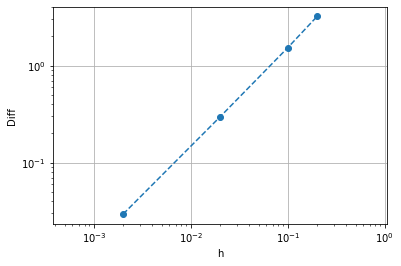

In [8]:
# Plot exact value and Euler approximation
hs = [0.002,0.02,0.1,0.2]
diffs = []
for h in hs:
    t,T = euler(f,0,100,1,h)
    diffs.append(abs(T[-1] - 80 * math.exp(-1) - 20))
plt.plot(hs,diffs,'--o')
plt.xlabel('h')
plt.ylabel('Diff')
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.grid()
plt.show()


Nuemrical value of T(4)at step h=0.2 is 28.589934592. Analytical solution is 30.826822658929018. Difference is 2.236888066929019
Nuemrical value of T(4)at step h=0.1 is 29.726132367245548. Analytical solution is 30.826822658929018. Difference is 1.1006902916834704
Nuemrical value of T(4)at step h=0.01 is 30.718373988636934. Analytical solution is 30.826822658929018. Difference is 0.10844867029208416


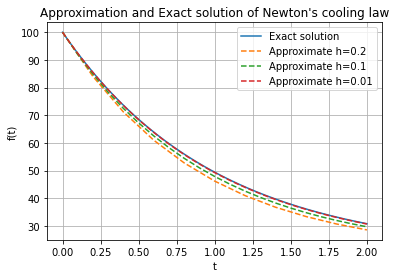

In [9]:
# Calculate T(2) under different h
t = np.arange(0,2.01,0.01)
y = np.array([80*math.exp(-i)+20 for i in t])
plt.plot(t,y,label='Exact solution')
plt.title('Approximation and Exact solution of Newton\'s cooling law')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
hs = [0.2,0.1,0.01]

for h in hs:
    t,T = euler(f,0,100,2,h)
    print(f'Nuemrical value of T(4)at step h={h} is {T[-1]}. Analytical solution is {80*math.exp(-2)+20}. Difference is {abs(80*math.exp(-2)+20-T[-1])}')
    plt.plot(t,T,'--',label=f'Approximate h={h}')

plt.legend(loc='upper right')
plt.show()